# SubPlots

If we look at the subplot documentation, we see that the first argument is the number of rows, the second the number of columns, and the third is the plot number. In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid.For instance, if we want to to create two plots side by side, we would call subplot with the parameters 1, 2, and 1. This would allow us to use 1 row, with 2 columns, and set the first axis to be the current axis.

So, let's create a new figure and then a new subplot with one row and two columns. The first axis object that pyplot will plot against is the left hand side.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

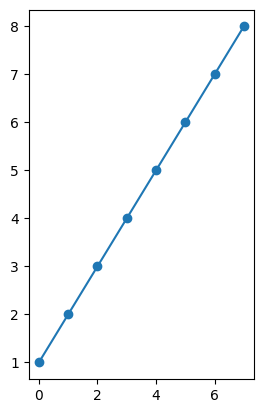

In [9]:
plt.figure()

ax1 = plt.subplot(1, 2, 1)
linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ax1.plot(linear_data, '-o')

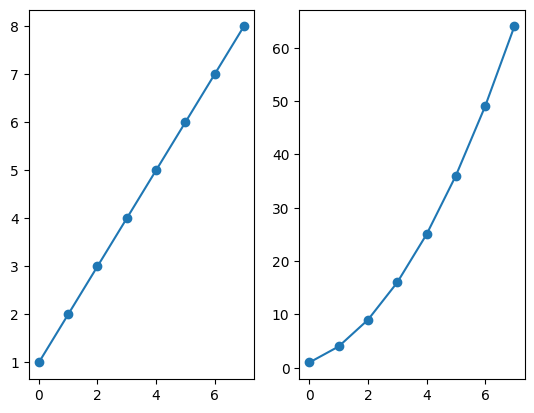

In [14]:
ax1 = plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8])
ax1.plot(linear_data, '-o')

ax2 = plt.subplot(1,2,2)
exponential_data = linear_data**2
ax2.plot(exponential_data, '-o')

And that's nice. Now we have two plots, each with their own axis objects. Now the norm with matplotlib is that you store the axis object that you get back from the subplot. But you can call subplot again. At any time with the parameters that interest you in order to get back a given axis.

Take a look at this figure though, do you notice anything odd about this image thinking of our first week of the course? The two images have different y axes values. This would be a problem and potential mislead the reader if we didn't find a way to lock axis between two plots. When you create a new subplot you are able to share the x, y, or both axis using the share x and share y parameters.

Let's clean this up.

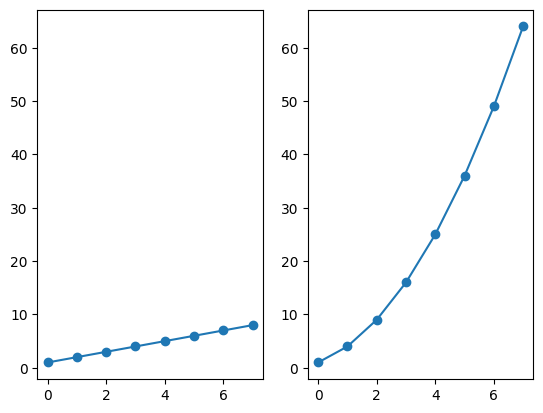

In [18]:
ax1 = plt.subplot(1,2,1)
ax1.plot(linear_data, '-o')

ax2 = plt.subplot(1,2,2, sharey= ax1)
ax2.plot(exponential_data, '-o')

There we go. Two plots side by side and we've locked the y axis.

Now, those of you who have been playing close attention will note that I used the subplot function a second time but I didn't pass in three parameters, just one. The maplotlib developers allow you to specify the row, columns, and number of the plot that you want with either three parameters or a single parameter. Where the hundreds values the first argument, the tens the second argument, and the ones the third argument.

Now, I'm frankly not a big fan of this second syntax -- it feels pretty hacky and it really only saves typing two commas and yet limits us to single digit. Computer science folks might feel a little twitch inside like something's wrong with this notation, and I'll say that it certainly bugged me the first few times I saw it. But I wanted you to be aware of it so you would be able to read it when you come across it in the docs.

An important fact to remember is that the plot location in the matrix of items is index starting at one and not at zero, as would be the convention if you were using something like NumPy. So if you're iterating through a matrix or list, create subplots, remember to start at position plus one.

Now, there's a nice function called subplots, note the plural, which allows you to get many axis objects at once, and I think this is great. So, if we wanted to get a three by three grid with all of the axis x and y ranges locked, we can do so like this.

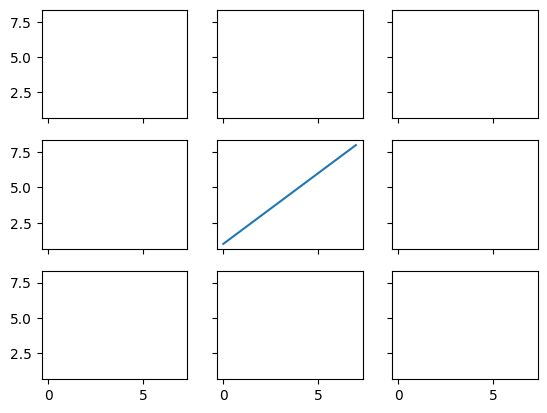

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
ax5.plot(linear_data, '-')

The syntax looks a little goofy maybe since we're unpacking the results of the subplots function directly, but it's an effective way to build a grid where everything shares an axis. The results however look really nice, but note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure.

Of course, we can just iterate through a list and plot one plot at a time, we don't have to store a reference to each axes.

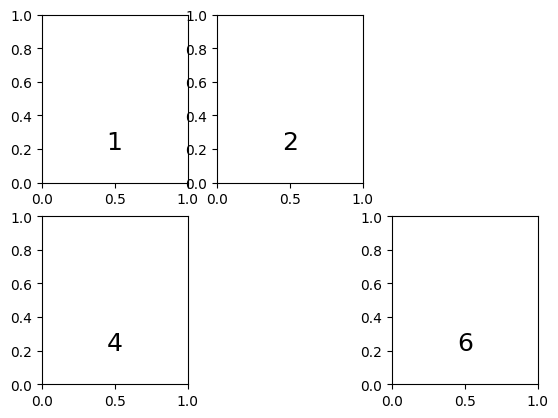

In [25]:
fig = plt.gcf()

for i in range(1, 7):
    if i !=5 and i !=3:
        ax = fig.add_subplot(2,3,i)
        ax.text(0.5, 0.2, str((i)), fontsize=18, ha='center')

## SPLOMS
So, we now understand why there are abstractions of Axes in a figure, because a figure might have several Axes objects which show multiple views of data. A common data science visual exploration technique is called the SPLOM, which stands for scatterplot matrices. These are particularly useful for getting the relationship between a number of different variables from a quick glance. Now, a SPLOM is actually similar to what Edward Tufte called a "small multiple" -- a set of visuals that look at related data but that slice that data into different small visuals so you can see both the trees and the forest at once.

Let's take a look, I'm going to use some data from the iris dataset

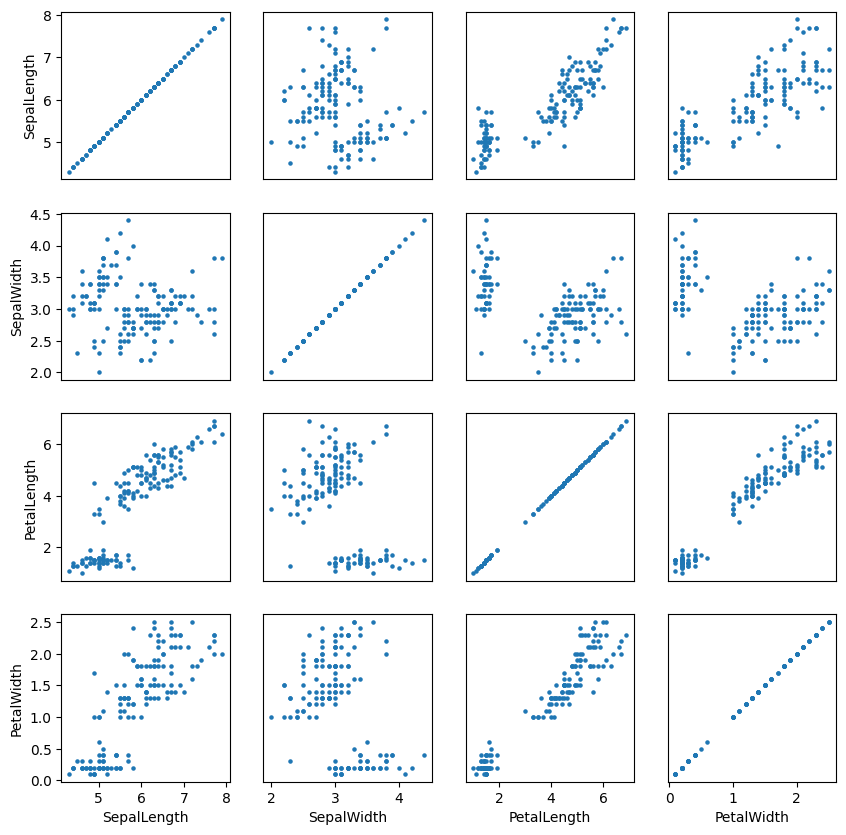

In [30]:
import pandas as pd

df = pd.read_csv('iris.csv')
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))
for i in range(len(cols)):
    for j in range(len(cols)):
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5)

        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])

        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

Okay, great! We have a nice example of a SPLOM, and we can easily compare the length and width of sepals and pedals. and look for trends at a glance. One that jumps out to me is that the petal width, the bottom row, has a pretty linear relationship with the petal length, the third scatter plot over. This doesn't seem to be true if you compared the sepalwidth to the sepal length, by looking at the second row and the first column cell.

In the next module, I want to exploit our new knowledge of subplots while introducing you to pretty fundamental data science chart, the histogram.